In [138]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

# PV-$\alpha$

In this model, voters are partitioned in two groups: Voting voters $V_v$ who cast a vote from $\{-1, +1\}$ and delegating voters $V_d$ who delegate their voter to some member of $V_v$.

### Parameters

External :
* $|V_v|$ and $|V_d|$

Internal :
* None

### Discussion

We assume uniformity assumption, so voters from $V_v$ vote for $+1$ with probability $1/2$ and $-1$ with probability $1/2$. Voters from $V_v$ delegate to any $v \in V_v$ with probability $1/|V_v|$.

Extreme cases : 
* $|V_v| = 1$ : Dictatorship
* $|V_d| = 0$ : Direct democracy


### Unweighted

We first assume that every voter has weight 1

In [155]:
def create_bill_PVa(n_v, n_d):
    v_v = np.random.randint(2, size=(n_v), dtype=int)
    v_d = np.random.randint(n_v, size=(n_d), dtype=int)
    return v_v, v_d

def test_critical_PVa(n_v, n_d):
    n = n_v + n_d
    v_v, v_d = create_bill_PVa(n_v, n_d)
    w = np.ones(n_v)
    for x in v_d:
        w[x] += 1
        
    vote_for = np.dot(v_v, w)*2 - n
    if vote_for >= 0:
        sign = 1
    elif vote_for < 0:
        sign = 0
        
        
    p_v = 0
    for i in range(n_v):
        if v_v[i] == sign:
            copy_v = v_v.copy()
            copy_v[i] = 1 - sign
            vote_for_copy = np.dot(copy_v, w)*2 - n
            if (vote_for_copy >= 0 and sign == 0) or (vote_for_copy < 0 and sign == 1):
                p_v += 1
    
    p_d = 0
    if vote_for >= -2 and vote_for < 2:
        for x in v_d:
            if v_v[x] == sign:
                p_d += 1
                
    if n_v == 0:
        n_v = 1
    if n_d == 0:
        n_d = 1
                
    return p_v/n_v, p_d/n_d


def expe_PVA(n_v, n_d, n_trys):
    p_v = 0
    p_d = 0
    
    for _ in range(n_trys):
        p_v_i, p_d_i = test_critical_PVa(n_v, n_d)
        p_v += p_v_i
        p_d += p_d_i
    
    return p_v/n_trys, p_d/n_trys
        

        
    
    

<b>Experiment #1 :</b> We change the number of voter, with 10% of voting voters

In [28]:
tab_n = range(1, 21)
len_tab = len(tab_n)
tab_res = np.zeros((2, len_tab))

for i, n in tqdm(enumerate(tab_n)):
    p_v, p_d = expe_PVA(5*n, 45*n, 10000)
    tab_res[0, i] = p_v
    tab_res[1, i] = p_d

20it [01:14,  3.74s/it]


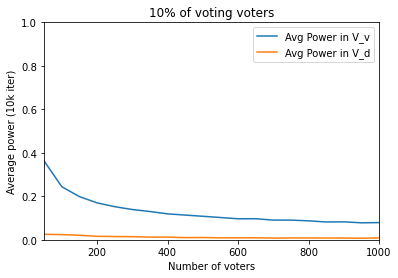

In [30]:
plt.plot([50*n for n in tab_n], tab_res[0], label = "Avg Power in V_v")
plt.plot([50*n for n in tab_n], tab_res[1], label = "Avg Power in V_d")
plt.legend()
plt.xlim(50,1000)
plt.title("10% of voting voters")
plt.xlabel("Number of voters")
plt.ylim(0,1)
plt.ylabel("Average power (10k iter)")
plt.show()

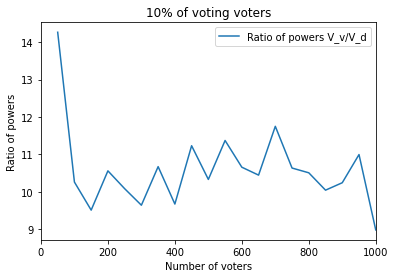

In [32]:
plt.plot([50*n for n in tab_n], tab_res[0]/tab_res[1], label = "Ratio of powers V_v/V_d")
plt.legend()
plt.xlim(0,1000)
plt.title("10% of voting voters")
plt.xlabel("Number of voters")
#plt.ylim(0,1)
plt.ylabel("Ratio of powers")
plt.show()

<b>Experiment 2 :</b> We change the proportion of voting voters, with 1000 voters

In [35]:
tab_n = range(0, 20)
len_tab = len(tab_n)
tab_res = np.zeros((2, len_tab))

for i, n in tqdm(enumerate(tab_n)):
    p_v, p_d = expe_PVA(1000-n*50, n*50, 10000)
    tab_res[0, i] = p_v
    tab_res[1, i] = p_d

20it [05:10, 15.50s/it]


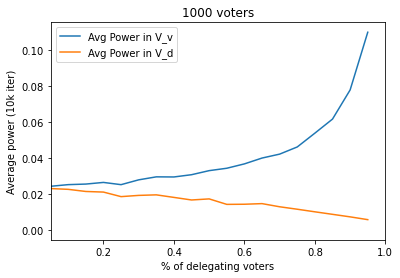

In [43]:
plt.plot([0.05*n for n in tab_n], tab_res[0], label = "Avg Power in V_v")
plt.plot([0.05*n for n in tab_n], tab_res[1], label = "Avg Power in V_d")
plt.legend()
plt.xlim(0.05,1)
plt.title("1000 voters")
plt.xlabel("% of delegating voters")
#plt.ylim(0,1)
plt.ylabel("Average power (10k iter)")
plt.show()

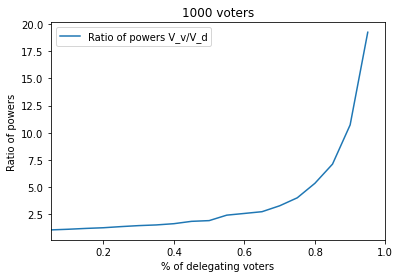

In [45]:
plt.plot([0.05*n for n in tab_n][1:], tab_res[0,1:]/tab_res[1,1:], label = "Ratio of powers V_v/V_d")
plt.legend()
plt.xlim(0,1000)
plt.xlim(0.05,1)
plt.title("1000 voters")
plt.xlabel("% of delegating voters")
#plt.ylim(0,1)
plt.ylabel("Ratio of powers")
plt.show()

### Weighted

Let's now see what happen, with a fix scenario $n=1000$ and $|V_v| = 100$ but weights are drawn at random between $1$ and $10$.

In [164]:
def test_critical_PVa(n_v, n_d, weights):
    n = n_v + n_d
    v_v, v_d = create_bill_PVa(n_v, n_d)
    w_v = weights[:n_v]
    w_d = weights[n_v:]
    w = w_v.copy()
    for i, x in enumerate(v_d):
        w[x] += w_d[i]
        
    vote_for = np.dot(v_v, w)*2 - np.sum(weights)
    if vote_for >= 0:
        sign = 1
    elif vote_for < 0:
        sign = 0
        
        
    p_v = np.zeros(n_v)
    for i in range(n_v):
        if v_v[i] == sign:
            copy_v = v_v.copy()
            copy_v[i] = 1 - sign
            vote_for_copy = np.dot(copy_v, w)*2 - np.sum(weights)
            if (vote_for_copy >= 0 and sign == 0) or (vote_for_copy < 0 and sign == 1):
                p_v[i] = 1
    
    p_d = np.zeros(n_d)
    for i, x in enumerate(v_d):
        if v_v[x] == sign:
            if vote_for >= -2*w_d[i] and vote_for < 2*w_d[i]:
                p_d[i] = 1
                
    return p_v, p_d


def expe_PVA(n_v, n_d, n_trys):
    p_v = np.zeros(10)
    p_d = np.zeros(10)
    c_v = np.zeros(10)
    c_d = np.zeros(10)
    
    for _ in range(n_trys):
        w = np.random.randint(10, size=(n_v+n_d))+1
        p_v_i, p_d_i = test_critical_PVa(n_v, n_d, w)
        for i in range(n_v):
            c_v[w[i]-1] += 1
            p_v[w[i]-1] += p_v_i[i]
        
        for i in range(n_d):
            c_d[w[n_v+i]-1] += 1
            p_d[w[n_v+i]-1] += p_d_i[i]
            
    return p_v/c_v, p_d/c_d
        


<b>Experiment #3 :</b> Weighted voting power

In [165]:
p_v, p_d = expe_PVA(100, 900, 10000)

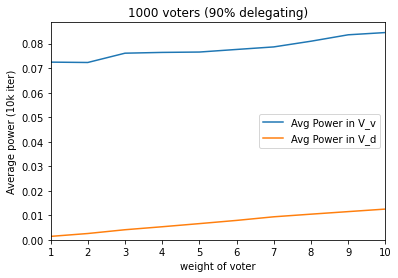

In [167]:
plt.plot(range(1,11), p_v, label = "Avg Power in V_v")
plt.plot(range(1,11), p_d, label = "Avg Power in V_d")
plt.legend()
plt.xlim(1, 10)
plt.title("1000 voters (90% delegating)")
plt.xlabel("weight of voter")
plt.ylim(0)
plt.ylabel("Average power (10k iter)")
plt.show()

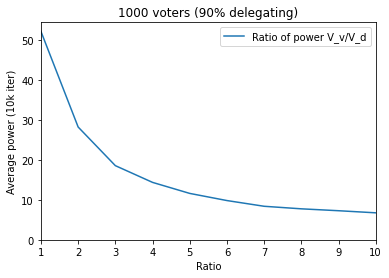

In [168]:
plt.plot(range(1,11), p_v/p_d, label = "Ratio of power V_v/V_d")
plt.legend()
plt.xlim(1, 10)
plt.title("1000 voters (90% delegating)")
plt.xlabel("Ratio")
plt.ylim(0)
plt.ylabel("Average power (10k iter)")
plt.show()

# PV-$\beta$

This model is very similar, but delegating voters have the choice to vote themselves or delegate to some voter in $V_v$.

### Parameters

External :

* $|V_v|$ and $|V_d|$

Internal :

* $p_d$ probability to delegate for voters in $V_d$.

### Discussion

Extreme case :

* $p_d = 0$ : Direct democracy
* $p_d = 1$ : PV-$\alpha$

### Unweighted

We first assume all weights = 1

In [169]:
def create_bill_PVb(n_v, n_d, proba_d):
    v_v = np.random.randint(2, size=(n_v), dtype=int)
    v_d_d = np.zeros(n_d, dtype=int)
    v_d_d[::] = proba_d <= np.random.rand(n_d)
    v_d_1 = np.random.randint(2, size=(n_d), dtype=int)
    v_d_2 = np.random.randint(n_v, size=(n_d), dtype=int)
    return v_v, (v_d_d, v_d_1, v_d_2)

def test_critical_PVb(n_v, n_d, proba_d):
    n = n_v + n_d
    v_v, (v_d_d, v_d_1, v_d_2) = create_bill_PVb(n_v, n_d, proba_d)
    votes = np.concatenate([v_v, [1], [0]])
    w = np.ones(n_v+2)
    w[-1] = 0
    w[-2] = 0
    
    for i in range(n_d):
        if v_d_d[i]:
            w[-1-v_d_1[i]] += 1
        else:
            w[v_d_2[i]] += 1
        
    vote_for = np.dot(votes, w)*2 - n
    if vote_for >= 0:
        sign = 1
    elif vote_for < 0:
        sign = 0
        
    p_v = 0
    for i in range(n_v):
        if v_v[i] == sign:
            copy_v = votes.copy()
            copy_v[i] = 1 - sign
            vote_for_copy = np.dot(copy_v, w)*2 - n
            if (vote_for_copy >= 0 and sign == 0) or (vote_for_copy < 0 and sign == 1):
                p_v += 1
    
    p_d = 0
    if vote_for >= -2 and vote_for < 2:
        for i in range(n_d):
            if v_d_d[i]:
                if v_d_1[i] == sign:
                    p_d += 1
            elif v_v[v_d_2[i]] == sign:
                p_d += 1
                
    if n_v == 0:
        n_v = 1
    if n_d == 0:
        n_d = 1
                
    return p_v/n_v, p_d/n_d


def expe_PVb(n_v, n_d, n_trys, proba_d):
    p_v = 0
    p_d = 0
    
    for _ in range(n_trys):
        p_v_i, p_d_i = test_critical_PVb(n_v, n_d, proba_d)
        p_v += p_v_i
        p_d += p_d_i
    
    return p_v/n_trys, p_d/n_trys
        

        
    

<b> Experiment 1b :</b> Changing number of voters

In [101]:
tab_n = range(1, 21)
len_tab = len(tab_n)
tab_res = np.zeros((2, len_tab))
proba_d = 0.8

for i, n in tqdm(enumerate(tab_n)):
    p_v, p_d = expe_PVb(5*n, 45*n, 10000, proba_d)
    tab_res[0, i] = p_v
    tab_res[1, i] = p_d

20it [01:40,  5.00s/it]


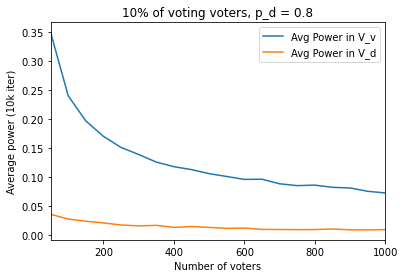

In [102]:
plt.plot([50*n for n in tab_n], tab_res[0], label = "Avg Power in V_v")
plt.plot([50*n for n in tab_n], tab_res[1], label = "Avg Power in V_d")
plt.legend()
plt.xlim(50,1000)
plt.title("10% of voting voters, p_d = 0.8")
plt.xlabel("Number of voters")
#plt.ylim(0,1)
plt.ylabel("Average power (10k iter)")
plt.show()

<b> Experiment 2b : </b> Changing % of voting voters

In [104]:
tab_n = range(0, 20)
len_tab = len(tab_n)
tab_res = np.zeros((2, len_tab))

for i, n in tqdm(enumerate(tab_n)):
    p_v, p_d = expe_PVb(1000-n*50, n*50, 10000, proba_d)
    tab_res[0, i] = p_v
    tab_res[1, i] = p_d

20it [05:18, 15.91s/it]


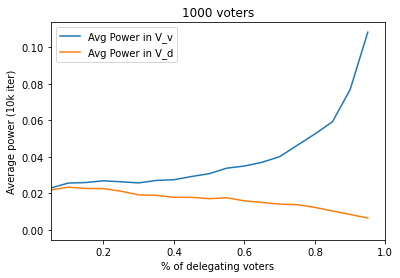

In [105]:
plt.plot([0.05*n for n in tab_n], tab_res[0], label = "Avg Power in V_v")
plt.plot([0.05*n for n in tab_n], tab_res[1], label = "Avg Power in V_d")
plt.legend()
plt.xlim(0.05,1)
plt.title("1000 voters")
plt.xlabel("% of delegating voters")
#plt.ylim(0,1)
plt.ylabel("Average power (10k iter)")
plt.show()

<b> Experiment 4 : </b> Changing probability to delegate $p_d$

In [106]:
tab_n = np.linspace(0,1,11)
len_tab = len(tab_n)
tab_res = np.zeros((2, len_tab))

for i, proba_d in tqdm(enumerate(tab_n)):
    p_v, p_d = expe_PVb(100, 900, 10000, proba_d)
    tab_res[0, i] = p_v
    tab_res[1, i] = p_d

11it [01:36,  8.77s/it]


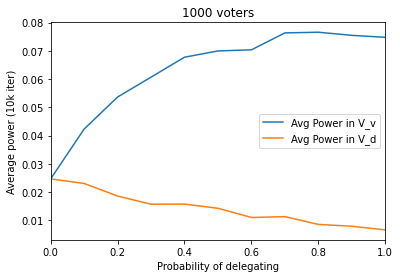

In [110]:
plt.plot(tab_n, tab_res[0], label = "Avg Power in V_v")
plt.plot(tab_n, tab_res[1], label = "Avg Power in V_d")
plt.legend()
plt.xlim(0,1)
plt.title("1000 voters")
plt.xlabel("Probability of delegating")
#plt.ylim(0,1)
plt.ylabel("Average power (10k iter)")
plt.show()

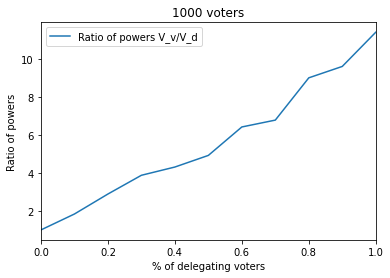

In [113]:
plt.plot(tab_n, tab_res[0]/tab_res[1], label = "Ratio of powers V_v/V_d")
plt.legend()
plt.xlim(0,1)
plt.title("1000 voters")
plt.xlabel("% of delegating voters")
#plt.ylim(0,1)
plt.ylabel("Ratio of powers")
plt.show()

### Weighted

In [171]:
def test_critical_PVb(n_v, n_d, weights, proba_d):
    n = n_v + n_d
    w_v = weights[:n_v]
    w_d = weights[n_v:]
    v_v, (v_d_d, v_d_1, v_d_2) = create_bill_PVb(n_v, n_d, proba_d)
    votes = np.concatenate([v_v, [1], [0]])
    w = np.concatenate([w_v.copy(), [0], [0]])
    
    for i in range(n_d):
        if v_d_d[i]:
            w[-1-v_d_1[i]] += w_d[i]
        else:
            w[v_d_2[i]] += w_d[i]
            
    vote_for = np.dot(votes, w)*2 - np.sum(weights)
    if vote_for >= 0:
        sign = 1
    elif vote_for < 0:
        sign = 0
        
        
    p_v = np.zeros(n_v)
    for i in range(n_v):
        if v_v[i] == sign:
            copy_v = votes.copy()
            copy_v[i] = 1 - sign
            vote_for_copy = np.dot(copy_v, w)*2 - np.sum(weights)
            if (vote_for_copy >= 0 and sign == 0) or (vote_for_copy < 0 and sign == 1):
                p_v[i] = 1
    
    p_d = np.zeros(n_d)
    for i in range(n_d):
        if v_d_d[i]:
            if v_d_1[i] == sign:
                if vote_for >= -2*w_d[i] and vote_for < 2*w_d[i]:
                    p_d[i] = 1
        elif v_v[v_d_2[i]] == sign:
            if vote_for >= -2*w_d[i] and vote_for < 2*w_d[i]:
                p_d[i] = 1
                
                
    return p_v, p_d


def expe_PVb(n_v, n_d, n_trys, proba_d):
    p_v = np.zeros(10)
    p_d = np.zeros(10)
    c_v = np.zeros(10)
    c_d = np.zeros(10)
    
    for _ in range(n_trys):
        w = np.random.randint(10, size=(n_v+n_d))+1
        p_v_i, p_d_i = test_critical_PVb(n_v, n_d, w, proba_d)
        for i in range(n_v):
            c_v[w[i]-1] += 1
            p_v[w[i]-1] += p_v_i[i]
        
        for i in range(n_d):
            c_d[w[n_v+i]-1] += 1
            p_d[w[n_v+i]-1] += p_d_i[i]
            
    
    return p_v/c_v, p_d/c_d
        


<b> Experiment 5 :</b> Weight and probability to delegate

In [172]:
tab_n = np.linspace(0,1,11)
len_tab = len(tab_n)
tab_res_v = np.zeros((len_tab, 10))
tab_res_d = np.zeros((len_tab, 10))

for i, proba_d in tqdm(enumerate(tab_n)):
    p_v, p_d = expe_PVb(100, 900, 10000, proba_d)
    tab_res_v[i] = p_v
    tab_res_d[i] = p_d
        

11it [05:53, 32.12s/it]


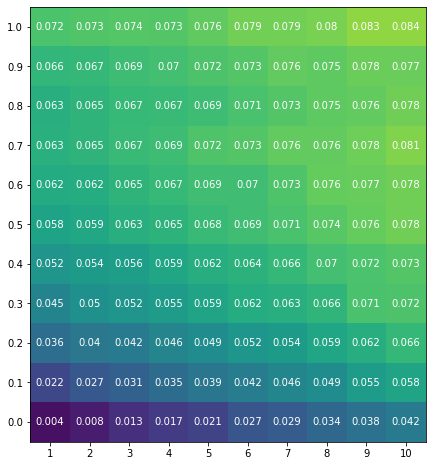

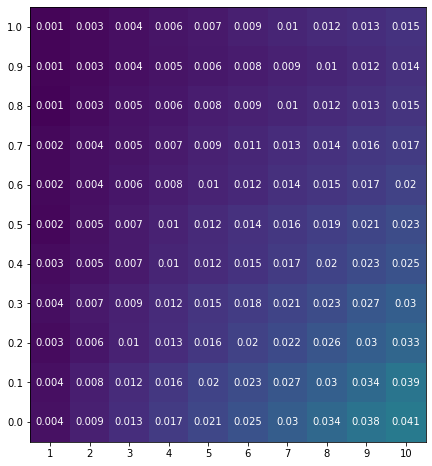

In [174]:
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(tab_res_v[::-1], vmin=0, vmax=0.1)
plt.xticks(range(10), range(1,11))
plt.yticks(range(11), np.round(np.linspace(0,1,11)[::-1],1))

for i in range(11):
    for j in range(10):
        text = ax.text(j, i, np.round(tab_res_v[::-1][i,j],3),
                       ha="center", va="center", color="w")
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(tab_res_d[::-1], vmin=0, vmax=0.1)
plt.xticks(range(10), range(1,11))
plt.yticks(range(11), np.round(np.linspace(0,1,11)[::-1],1))

for i in range(11):
    for j in range(10):
        text = ax.text(j, i, np.round(tab_res_d[::-1][i,j],3),
                       ha="center", va="center", color="w")
plt.show()

# LD

In this last model, every voter can delegate to every other voter, or vote themselves. This can lead to delegation chains, or delegation cycles. The probability to delegate is $p_d$ and the probability to delegate to a particular voter is $p_d \times \frac{1}{|V| -1}$. The probability to answer $+1$ or $-1$ is $\frac{1-p_d}{2}$.

### Parameters

External :

* $|V_v|$ and $|V_d|$

Internal :

* p_d probability to delegate for voters in $V_d$.

### Discussion

Extreme case :

* $p_d = 0$ : Direct democracy
* $p_d = 1$: Nobody vote

### Unweighted

In [196]:
def create_bill_LD(n, proba_d):
    v_d = np.zeros(n, dtype=int)
    v_d[::] = proba_d <= np.random.rand(n)
    v_1 = np.random.randint(2, size=(n), dtype=int)
    v_2 = np.random.randint(n, size=(n), dtype=int)
    for i in range(n):
        while v_2[i] == i:
            v_2[i] = np.random.randint(n)
                
    return v_d, v_1, v_2

def test_critical_LD(n, proba_d):
    v_d, v_1, v_2 = create_bill_LD(n, proba_d)
    v = np.zeros(n)
    
    q = []
        
    for i in range(n):
        if v_d[i]:
            v[i] = 2*v_1[i]-1
        else:
            q.append(i)
            
    abst = []
    while q != []:
        x = q.pop()
        if x in abst or v[x] != 0:
            continue
        seen = []
        while x not in seen and x not in abst and v[x] == 0:
            seen.append(x)
            x = v_2[x]
        
        if x in seen or x in abst:
            for y in seen:
                if y not in abst:
                    abst.append(y)
        else:
            r = v[x]
            for y in seen:
                v[y] = r
                
    return abst


def expe_LD(n, n_trys, proba_d):
    abst = 0
    
    for _ in (range(n_trys)):
        abst_i = test_critical_LD(n, proba_d)
        abst += len(abst_i)
    
    return abst/n_trys
        


<b> Experiment 6 :</b> % of abstaining voters

In [198]:
tab_n = np.linspace(0,0.9,10)
len_tab = len(tab_n)
tab_res = np.zeros((len_tab))

for i, proba_d in tqdm(enumerate(tab_n)):
    abst = expe_LD(1000, 10000, proba_d)
    tab_res[i] = abst
        

10it [04:30, 27.07s/it]


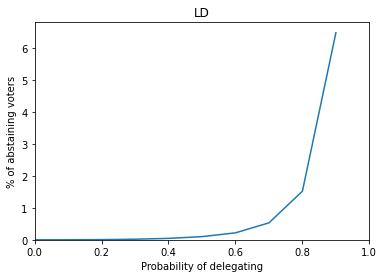

In [202]:
plt.plot(tab_n, tab_res/10)
plt.xlim(0,1)
plt.title("LD")
plt.xlabel("Probability of delegating")
plt.ylim(0)
plt.ylabel("% of abstaining voters")
plt.show()

<b>Experiment 1c :</b> Evolution with # of voters

<b>Experiment 4b :</b> Evolution with $p_d$

### Weighted

<b> Experiment 6b : </b> Weight and $p_d$

# Comparaison